# Life Expectancy prediction on who dataset

## We will be using multiple Linear Regression and see how it performs on the dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dataset= pd.read_csv('who.csv')
print(dataset)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [54]:
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Arranging the dataset for better readability by moving the dependent target variable to the last index

In [55]:
cols= dataset.columns.tolist()
cols.append(cols.pop(cols.index('Life expectancy ')))
cols

['Country',
 'Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Life expectancy ']

In [56]:
dataset = dataset[cols]
dataset = dataset.drop(df.columns[0], axis=1)
print(dataset)

      Year      Status  Adult Mortality  infant deaths  Alcohol  \
0     2015  Developing            263.0             62     0.01   
1     2014  Developing            271.0             64     0.01   
2     2013  Developing            268.0             66     0.01   
3     2012  Developing            272.0             69     0.01   
4     2011  Developing            275.0             71     0.01   
...    ...         ...              ...            ...      ...   
2933  2004  Developing            723.0             27     4.36   
2934  2003  Developing            715.0             26     4.06   
2935  2002  Developing             73.0             25     4.43   
2936  2001  Developing            686.0             25     1.72   
2937  2000  Developing            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2        

## Some basic visualisations to see

/home/jupyter/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


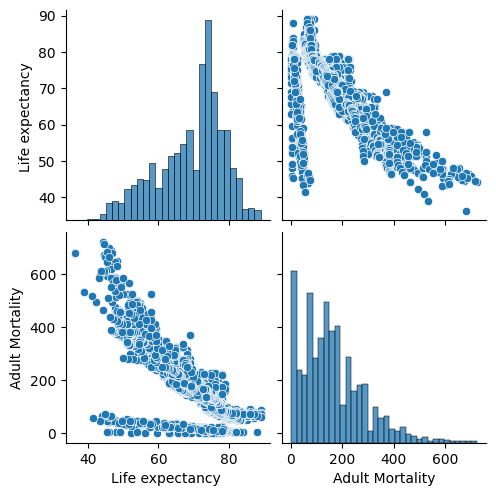

In [57]:
sns.pairplot(dataset[['Life expectancy ',  'Adult Mortality']])
plt.show()


In [58]:
correlation = dataset['Life expectancy '].corr(dataset['Adult Mortality'])
print('Pearson correlation coefficient:', correlation)

Pearson correlation coefficient: -0.6963593137699761


The above result of a negative correlation coefficient does make a lot of sense because if Adult Mortality is going to be high then offcourse the life expectance will be low

## Loading the dependent and independent variables

In [59]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## One Hot encoding of categorical variables

importing the required libraries

In [60]:
dataset.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [79]:
# column_names = ['Country', 'Status']
# # Get the indices of the specified columns
# column_indices = [df.columns.get_loc(column) for column in column_names]

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_indices)], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# #[0] denotes the index of column to be transformed

# List of column names to find the indices for
column_names = ['Status']

# Get the indices of the specified columns
column_indices = [dataset.columns.get_loc(column) for column in column_names]

# Prepare the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_indices)], remainder='passthrough')

# Assuming X is your feature matrix
X = df.values  # Replace with your actual feature matrix if different

# Apply the transformation
X = np.array(ct.fit_transform(X))

X


array([[0.0, 0.0, 0.0, ..., 17.3, 0.479, 10.1],
       [0.0, 0.0, 0.0, ..., 17.5, 0.476, 10.0],
       [0.0, 0.0, 0.0, ..., 17.7, 0.47, 9.9],
       ...,
       [0.0, 0.0, 1.0, ..., 1.3, 0.427, 10.0],
       [0.0, 1.0, 0.0, ..., 1.7, 0.427, 9.8],
       [1.0, 0.0, 0.0, ..., 11.2, 0.434, 9.8]], dtype=object)

In [80]:
print(X)

[[0.0 0.0 0.0 ... 17.3 0.479 10.1]
 [0.0 0.0 0.0 ... 17.5 0.476 10.0]
 [0.0 0.0 0.0 ... 17.7 0.47 9.9]
 ...
 [0.0 0.0 1.0 ... 1.3 0.427 10.0]
 [0.0 1.0 0.0 ... 1.7 0.427 9.8]
 [1.0 0.0 0.0 ... 11.2 0.434 9.8]]


## Splitting the test set and training set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the multiple Linear Regression Model

In [91]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('who.csv')

# Arrange the dataset by moving the target variable 'Life expectancy ' to the last column
cols = dataset.columns.tolist()
cols.append(cols.pop(cols.index('Life expectancy ')))
dataset = dataset[cols]

# Drop the 'Country' column
dataset = dataset.drop(columns=['Country'])

# Define the independent variables (X) and the dependent variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# One-hot encode the 'Status' column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Reshape y to be a 2D array and impute missing values
y = y.reshape(-1, 1)
y = imputer.fit_transform(y)
y = y.ravel()  # Reshape back to 1D array

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 16.31819018892311
R^2 Score: 0.8207608535527988


In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Using Ridge Regression for regularization
ridge_regressor = Ridge(alpha=0.98)
ridge_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluate the model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')

# Cross-Validation
cv_scores = cross_val_score(ridge_regressor, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Mean Cross-validated R^2 score: {np.mean(cv_scores)}')


Ridge Regression - Mean Squared Error: 16.312072857750874
Ridge Regression - R^2 Score: 0.8208280463729064
Cross-validated R^2 scores: [0.81156613 0.80486802 0.7966773  0.70526342 0.81638689]
Mean Cross-validated R^2 score: 0.7869523528195128


/home/jupyter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.46691e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/jupyter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.202e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/jupyter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.17144e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/jupyter/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.05538e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/jupyter/.local/lib/python3.8/site-packages/sklea

In [76]:
X[1]

array([2014, 'Developing', 271.0, 64, 0.01, 73.52358168, 62.0, 492, 18.6,
       86, 58.0, 8.18, 62.0, 0.1, 612.696514, 327582.0, 17.5, 17.5, 0.476,
       10.0], dtype=object)

## final

In [101]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('who.csv')

# Arrange the dataset by moving the target variable 'Life expectancy ' to the last column
cols = dataset.columns.tolist()
cols.append(cols.pop(cols.index('Life expectancy ')))
dataset = dataset[cols]

# Drop the 'Country' column
dataset = dataset.drop(columns=['Country'])

# Define the independent variables (X) and the dependent variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# One-hot encode the 'Status' column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Reshape y to be a 2D array and impute missing values
y = y.reshape(-1, 1)
y = imputer.fit_transform(y)
y = y.ravel()  # Reshape back to 1D array

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the multiple linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 16.31819018892311
R^2 Score: 0.8207608535527988
